# Load water level data from DMI

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
from anomalydetection.detectors import AnomalyDetectionPipeline, RangeDetector, DiffRangeDetector, PeakDetector, HampelDetector

In [4]:
file_path = os.path.join("..", "tests", "data", "Ballen_20150218-20201222.csv")
df = pd.read_csv(file_path, index_col=0, parse_dates=True)
data = df.water_level

# Detect anomalies outside manually set range

In [5]:
range_anomalies = RangeDetector(-1, 1).detect(data)

<IPython.core.display.Javascript object>


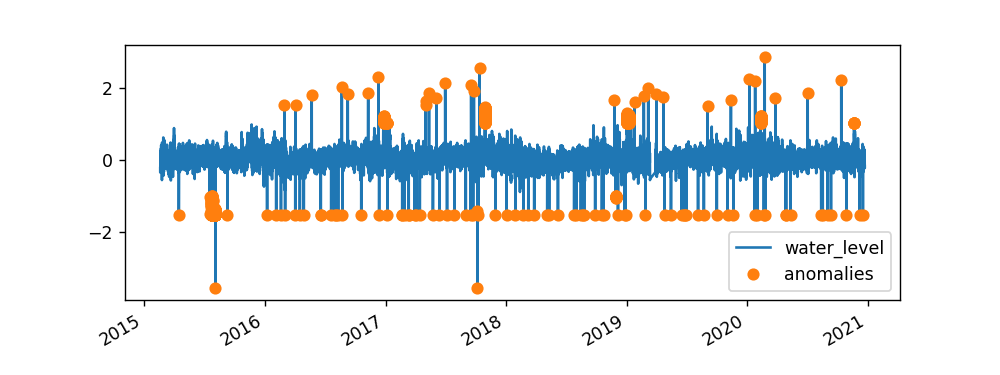

<AxesSubplot:>

In [6]:
detected = data.to_frame()
detected["anomalies"] = data[range_anomalies.values]
detected.plot(style=['-', 'o'], figsize=(8,3))

# Detect anomalies outside automatically set range

In [7]:
N = 1000
normal_data, test_data = data[:N], data[N:]

In [8]:
anomaly_detector = AnomalyDetectionPipeline([RangeDetector(), DiffRangeDetector()])
anomaly_detector.fit(normal_data)
detected_anomalies = anomaly_detector.detect_detailed(test_data)

In [9]:
detected_anomalies.head()

,is_anomaly,"RangeDetector(-0.5600000023841858, 0.4799999892711639)","DiffRangeDetector(-0.0400000028312207, 0.05000001192092901)"
2015-02-25 12:30:00,False,False,False
2015-02-25 12:40:00,False,False,False
2015-02-25 12:50:00,False,False,False
2015-02-25 13:00:00,False,False,False
2015-02-25 13:20:00,False,False,False


<IPython.core.display.Javascript object>


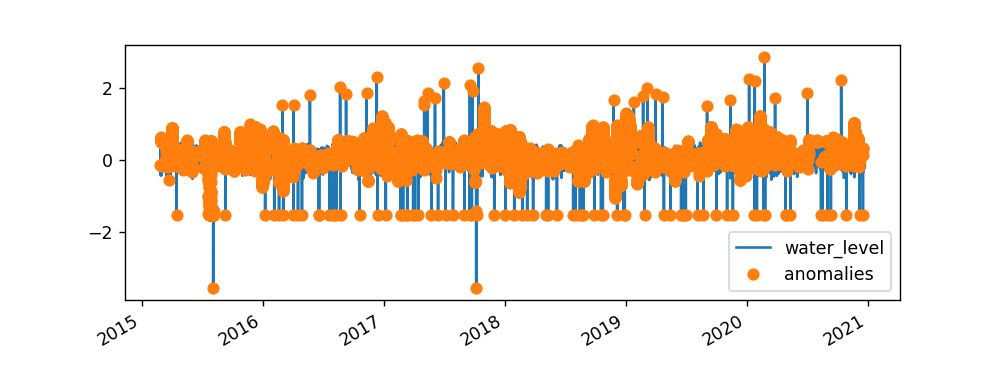

<AxesSubplot:>

In [10]:
detected = test_data.to_frame()
detected["anomalies"] = test_data[detected_anomalies.is_anomaly]
detected.plot(style=['-', 'o'], figsize=(8,3))

# Detect peaks

In [11]:
detector = PeakDetector(10, 0.1)
std_anomalies = detector.detect(data)
std_anomalies[0] = False

<IPython.core.display.Javascript object>


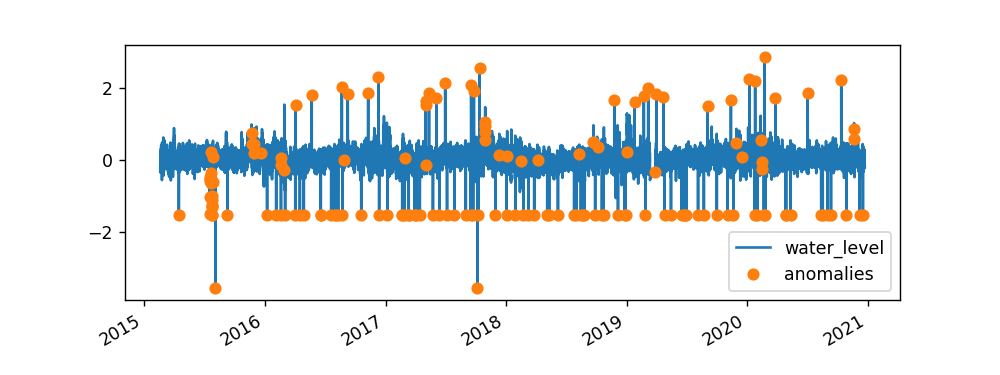

<AxesSubplot:>

In [12]:
detected = data.to_frame()
detected["anomalies"] = data[std_anomalies.values]
detected.plot(style=['-', 'o'], figsize=(8,3))

# Hampel filter

In [39]:
detector = HampelDetector(window_size=20)

In [40]:
data_part = data.head(50000)

In [41]:
anomalies = detector.detect(data_part)

<IPython.core.display.Javascript object>


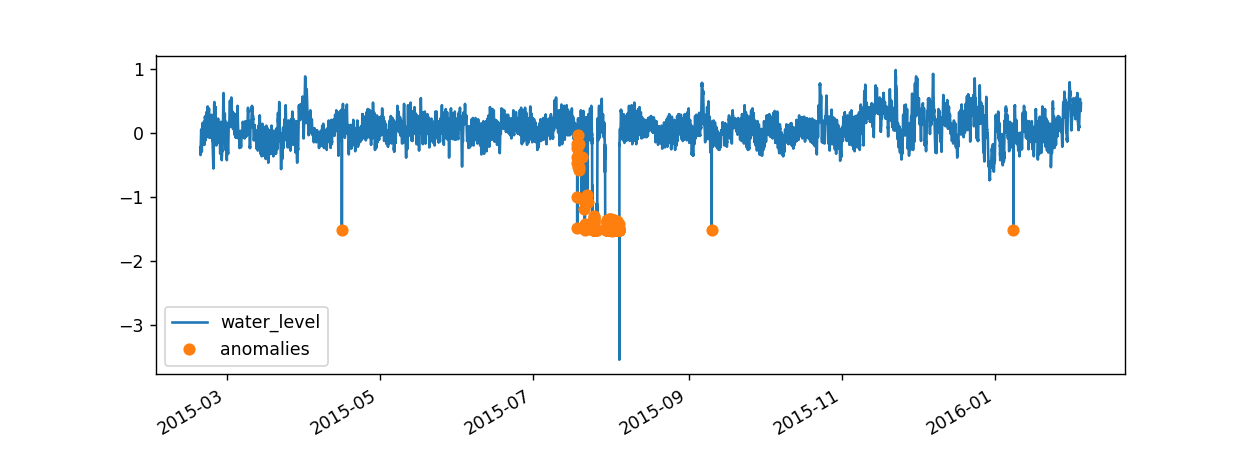

<AxesSubplot:>

In [42]:
detected = data_part.to_frame()
detected["anomalies"] = data_part[anomalies.values]
detected.plot(style=['-', 'o'], figsize=(8,3))